In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fruit_Classification_1000_noisy.csv')
df

,Color,Weight,Texture,Size,FruitType
0,Red,111,Bumpy,5.54,Apple
1,Red,116,Smooth,6.03,Apple
2,Red,111,Smooth,5.51,Apple
3,Red,145,Smooth,6.20,Apple
4,Green,124,Bumpy,6.02,Apple
...,...,...,...,...,...
995,Green,101,Bumpy,7.02,Banana
996,Green,131,Smooth,6.67,Banana
997,Yellow,120,Smooth,7.72,Banana
998,Yellow,149,Smooth,7.20,Banana


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Color      1000 non-null   object 
 1   Weight     1000 non-null   int64  
 2   Texture    1000 non-null   object 
 3   Size       1000 non-null   float64
 4   FruitType  1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [4]:
df.isnull().sum()

Color        0
Weight       0
Texture      0
Size         0
FruitType    0
dtype: int64

In [5]:
X = df.drop(columns=['FruitType'])
y = df["FruitType"]

In [6]:
from sklearn.preprocessing import LabelEncoder
le_color = LabelEncoder()
le_texture = LabelEncoder()
le_fruit = LabelEncoder()

X["Color"] = le_color.fit_transform(X["Color"])
X["Texture"] = le_texture.fit_transform(X["Texture"])
y = le_fruit.fit_transform(y)

In [7]:
counts = df["Size"].min()
counts

5.2

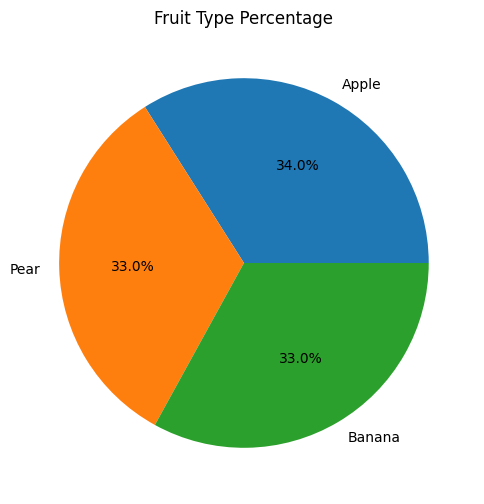

In [8]:
counts = df["FruitType"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct="%1.1f%%"
)
plt.title("Fruit Type Percentage")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"]
}

from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [11]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [12]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))

Tuned Accuracy: 0.825


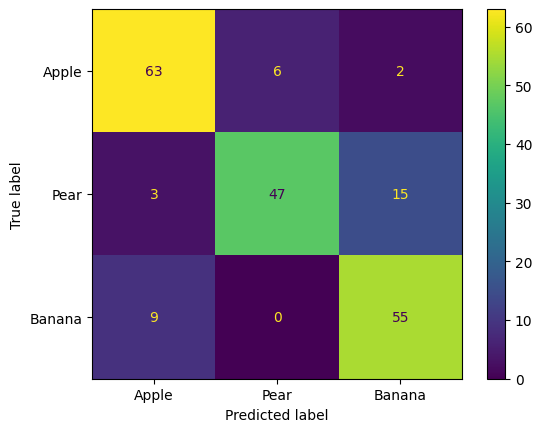

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix= cm,
                                 display_labels= df['FruitType'].unique())
cm_plot.plot()
plt.savefig('cm.png')
plt.show()

In [14]:
X_test

,Color,Weight,Texture,Size
521,2,168,0,6.85
737,2,126,0,7.74
740,0,129,1,7.13
660,0,155,1,6.28
411,2,147,0,6.08
...,...,...,...,...
408,0,166,1,7.09
332,1,132,1,5.63
208,1,139,1,6.11
613,2,172,1,6.59


In [15]:
y_test

array([2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0,
       2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1,
       2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1,
       1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 1,
       2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2,
       0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0,
       2, 0])

In [16]:
ans=best_model.predict([[2,126,0,7.78]])
fruit_name = le_fruit.inverse_transform(ans)
print("Predicted Fruit:", fruit_name[0])

Predicted Fruit: Banana


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [17]:
import joblib
joblib.dump(best_model,'decision_tree_model.joblib')
print('Success')

Success
